# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the data

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')

In [ ]:
x = dataset.iloc[:, 0].values   # First Column has the independent variable
y = dataset.iloc[:, 1].values    # Second Column has the dependent variable

In [ ]:
x_plot = x
y_plot = y

# Visualization

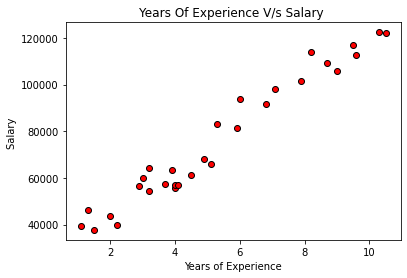

In [ ]:
plt.scatter(x, y, color='red', edgecolor='black')
plt.title('Years Of Experience V/s Salary ')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ')
plt.show()

# Preprocessing

In [ ]:
# Featue scaling
x = (x - np.mean(x))/np.std(x)
y = (y - np.mean(y))/np.std(y)

In [ ]:
X = np.column_stack((np.ones((len(x), 1)), x))    # This is done so we can use vectorization
y = y.reshape((len(y), 1))                        # making sure that the array is properly shaped

# Initializing the weights

In [ ]:
Weights = np.random.randn(2, 1)         # This can be intialized as an array of 0's as well

# Cost Function

In [ ]:
def cost(X, y, Weights):
  m = X.shape[0]

  J = (1/(2*m))*(np.sum(np.square(np.dot(X, Weights) - y)))   # Mean Squared Error

  return J

# Gradient Function

In [ ]:
def gradient(X, y, Weights):
  m = X.shape[0]

  grad_0 = (1/m)*(np.sum(np.dot(X, Weights) - y))
  grad_1 = (1/m)*(np.sum((np.dot(X, Weights) - y)*X[:, 1].reshape((m, 1))))

  return grad_0, grad_1

# Model

In [ ]:
alpha = 0.01      # Learning rate parameter
num_iter = 500    # No. of iterations
J_hist = np.zeros((num_iter, 1))


# We will be performing batch gradient descent
for i in range(num_iter):
  grad_0, grad_1 = gradient(X, y, Weights)
  
  Weights[0] = Weights[0] - alpha*grad_0
  Weights[1] = Weights[1] - alpha*grad_1

  J_hist[i] = cost(X, y, Weights)


# Plot for Cost function Vs No. of Iterations

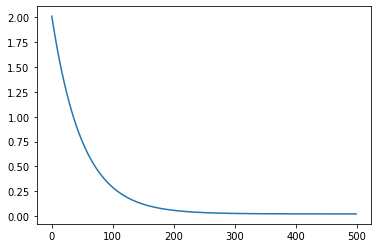

In [ ]:
# This is done to make sure our cost is going down with every iteration,
# this is tells us that our Batch Gradient Descent algorithm is working properly
# and the Weights and converging

iterations = [j for j in range(num_iter)]
plt.plot(iterations, J_hist)
plt.show()

# Plotting the prediction 

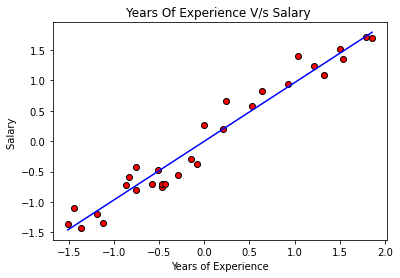

In [ ]:
y_pred = np.dot(X, Weights)

plt.scatter(x, y, color='red', edgecolor='black')
plt.plot(x, y_pred, color='blue')
plt.title('Years Of Experience V/s Salary ')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ')
plt.show()

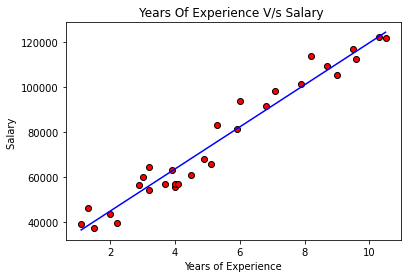

In [ ]:
# This is the same plot as above, the only difference is the values are rescaled
# back to the original values before feature scaling, for better visualization

y_pred_orig = y_pred * np.std(y_plot) + np.mean(y_plot)

plt.scatter(x_plot, y_plot, color='red', edgecolor='black')
plt.plot(x_plot, y_pred_orig, color='blue')
plt.title('Years Of Experience V/s Salary ')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ')
plt.show()